In [1]:
def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv.Canny(image, lower, upper)
    return edged

In [2]:
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import fftpack
import PIL
from PIL import Image,ImageEnhance
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)
import numpy as np

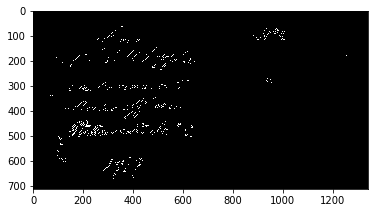

In [46]:
img1=cv.imread("H05.bmp",0)
blurred = cv.GaussianBlur(img1, (1,1), 0)
auto = auto_canny(blurred)
plt.imshow(auto, cmap='gray')

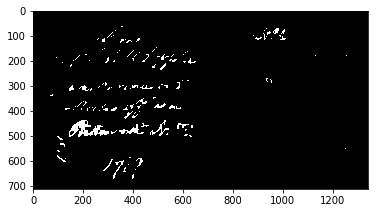

In [47]:
kernel = np.ones((9,5),np.uint8)
closing = cv.morphologyEx(auto, cv.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

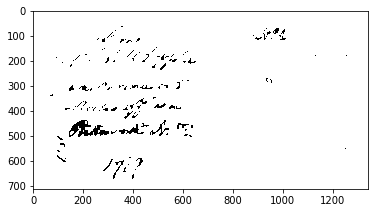

In [48]:
inv = cv.bitwise_not(closing)
plt.imshow(inv, cmap='gray')

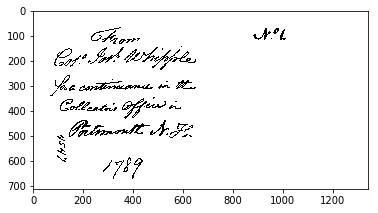

In [50]:
out_image = inv
image = cv.imread('h05.bmp',0)
gt_image = cv.imread('h05.tiff',0)
plt.imshow(gt_image, cmap='gray')

In [51]:
fm = []
image = rgb2gray(image)
image = np.uint8(np.floor(image))
gt_image = rgb2gray(gt_image)
gt_image = np.uint8(np.floor(gt_image))
rows, columns = gt_image.shape
fp = np.count_nonzero(np.greater(gt_image, out_image))
fn = np.count_nonzero(np.greater(out_image, gt_image))
tp = np.count_nonzero(np.logical_and(np.equal(gt_image, out_image), np.equal(gt_image, np.zeros((rows, columns)))))
recall = tp/(tp+fn)
precision = tp/(tp+fp)
fscore = ((2*recall*precision)/(precision+recall))
fm.append(fscore)
fm = np.array(fm)

In [52]:
print (fm*100)

[52.75359278]
